# Convolutional Neural Networks 
---

#### Example CNN

The typical architecture of CNNs has a couple of convolutional layers, followed by _fully connected_ layer, i.e. feed forward NN.

In some of the most famous CNN architectures it is common to alternate convolutional and pooling layers, like this. Shown below is one of the classical CNN architecture, LeNet-5.

<img src='cnn_with_poolin.jpeg' >

## CNNs in Keras

In [3]:
from tensorflow.keras import backend as K
import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist, fashion_mnist,cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Preprocess the data:

In [4]:
# Load data:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [5]:
# Check shapes:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# To feed the images in a CNN we need to reshape our X data to the format 
# (batch/sample, width, heigth, channels):
# The mnist data are black and white images so we need just 1 color channel

Xtrain = xtrain.reshape(60000, 28, 28,1)
Xtest = xtest.reshape(10000, 28, 28,1)

In [7]:
# Always keep checking shapes:
print('Xtrain shape:', Xtrain.shape)
print(Xtrain.shape[0], 'train samples')
print(Xtest.shape[0], 'test samples')
print(Xtrain[0].shape, 'image shape')
print('ytrain shape:', ytrain.shape)

Xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape
ytrain shape: (60000,)


In [8]:
Xtrain

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


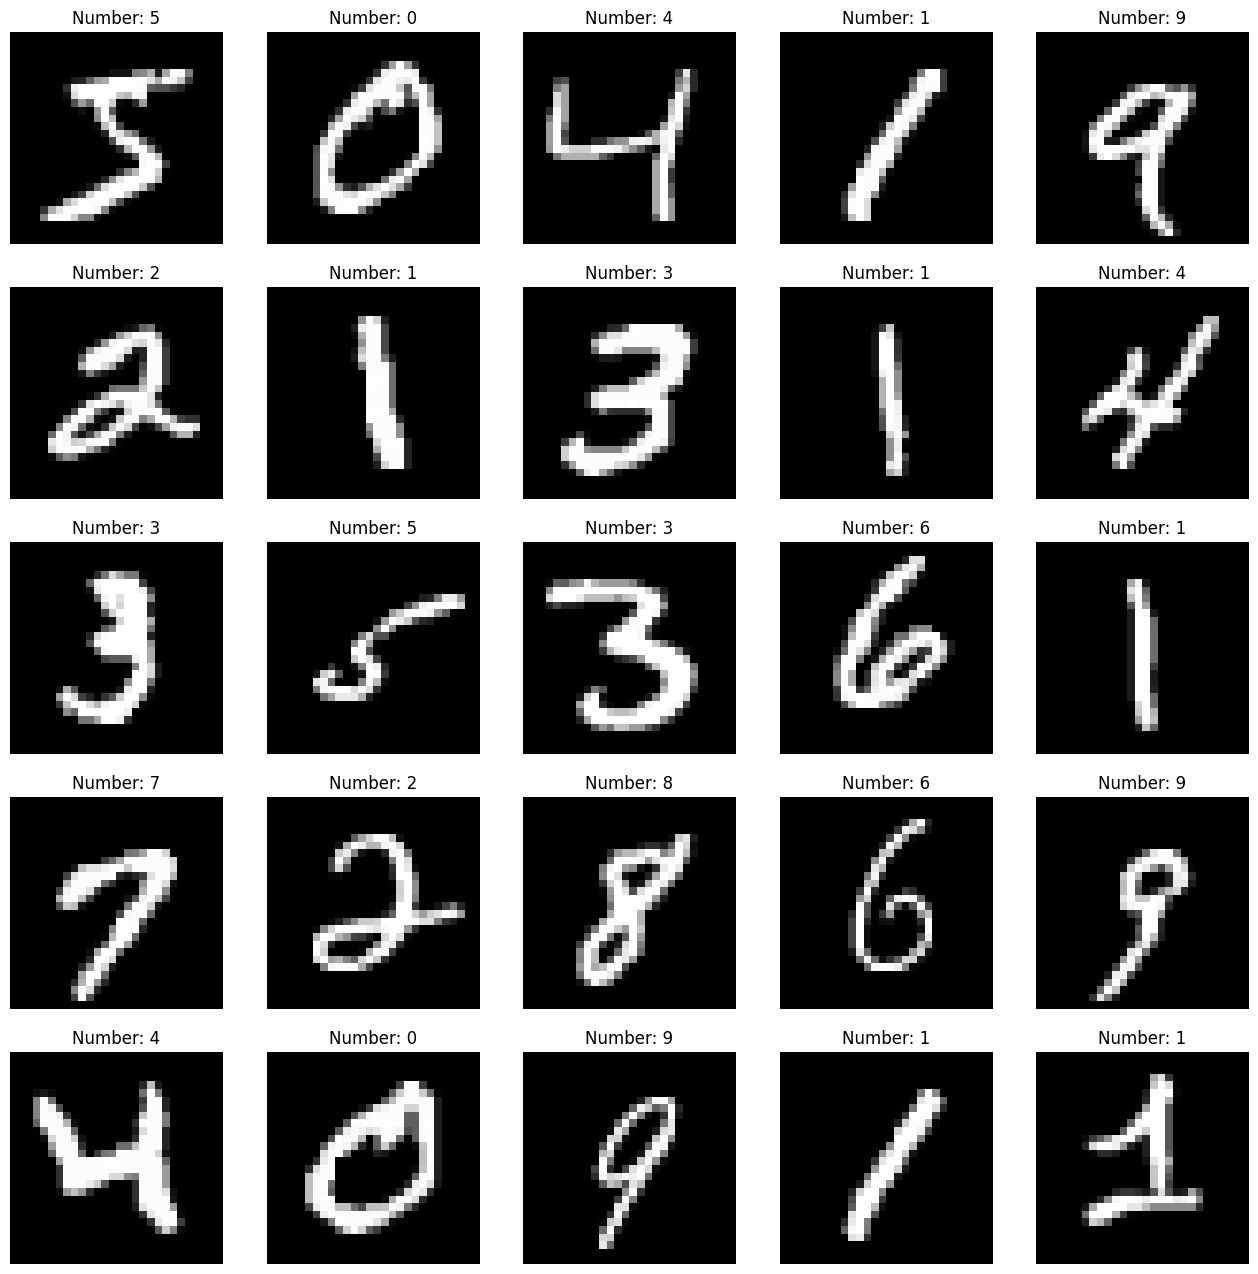

In [9]:
# plot the train images  with the labels
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5, 5, i+1,title=f'Number: {ytrain[i]}')
    plt.imshow(xtrain[i],cmap='gray')
    plt.axis('off')

In [10]:
# The labels are 10 numbers (0...9) we transform it into 10 classes 
# ytrain, ytest from number to categorical/dummies

ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytrain)

In [11]:
ytrain_cat.shape

(60000, 10)

In [12]:
ytrain_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
# from categorical to number
#argmax gives the index of the max value in each row
np.argmax(ytrain_cat,axis=1),np.argmax(ytest_cat,axis=1)

(array([5, 0, 4, ..., 5, 6, 8]), array([5, 0, 4, ..., 5, 6, 8]))

In [14]:
print('After preprocessing also y:\n')
print('Xtrain shape:', Xtrain.shape)
print(Xtrain.shape[0], 'train samples')
print(Xtest.shape[0], 'test samples')
print(Xtrain[0].shape, 'image shape')
print('ytrain cat shape:', ytrain_cat.shape)

After preprocessing also y:

Xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape
ytrain cat shape: (60000, 10)


#### LeNet-5 in Keras

Implement LeNet-5 architecture from above. 

Use `relu` activation function for convolutional and fully-connected (dense) layers, and `softmax` for the output layer.

Q: How do we deal with the fact that our images (28x28) are smaller than the input images in LeNet-t (32, 32)?

Links to layers documentation:
+ [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)
+ [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
+ [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/)
+ [Dense](https://keras.io/api/layers/core_layers/dense/)
+ [Weight Initializers](https://keras.io/api/layers/initializers/)
+ [Activation Functions](https://keras.io/api/layers/activations/)


<img src='cnn_with_poolin.jpeg' width=600 heigth=600>

**config**

In [32]:
### Implement LeNet-5 architecture 
K.clear_session()
model = Sequential([
    
    ### Convolutional layers
    Conv2D(filters = 6 , kernel_size = (5,5), 
           strides = (1,1), padding = "valid", 
           activation = tk.activations.relu , input_shape = (28,28,1), # use relu
           kernel_initializer=tk.initializers.GlorotNormal(seed=34)),  # how to initialise the model parameters
           
    
    MaxPooling2D(pool_size = (2,2), strides=(2,2), padding = "valid"),
    
    Conv2D(filters = 16, kernel_size = (5,5), 
           strides = (1,1), padding = "valid" , 
           activation = tk.activations.relu, input_shape = (10,10,16)) ,  # use relu
           #kernel_initializer=tk.initializers.GlorotNormal(seed=34)),
            
    
    MaxPooling2D(pool_size = (2,2), strides=(2,2), padding = "valid"),
    
    ### Fully connected layers for classification
    
    Flatten(),
    
    Dense(units=400, activation= tk.activations.relu),  # use relu
    
    Dense(units=120, activation=tk.activations.relu), # use relu
          
    
    
    # Output layer
    # think of how many categories we have to predict 
    Dense(units=10, activation=tk.activations.softmax)
])

In [33]:
# Check the summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 400)               1

+ [List of optimizers](https://keras.io/api/optimizers/)
+ [List of Loss functions](https://keras.io/api/losses/)

In [34]:
# Compile 
model.compile(optimizer=tk.optimizers.Adam(), # Adam()
              loss=tk.losses.categorical_crossentropy , # multiclass: 'categorical_crossentropy' 
              metrics=['accuracy'])

In [35]:
Xtrain.shape,ytrain_cat.shape

((60000, 28, 28, 1), (60000, 10))

In [36]:
# Train the model
history = model.fit(Xtrain, ytrain_cat, epochs=20,
                    batch_size=60,
                    validation_split = 0.2,
                   )

Epoch 1/20
800/800 [==============================] - 31s 36ms/step - loss: 0.4575 - accuracy: 0.9131 - val_loss: 0.1329 - val_accuracy: 0.9626
Epoch 2/20
800/800 [==============================] - 28s 35ms/step - loss: 0.0962 - accuracy: 0.9708 - val_loss: 0.0957 - val_accuracy: 0.9728
Epoch 3/20
800/800 [==============================] - 23s 29ms/step - loss: 0.0718 - accuracy: 0.9780 - val_loss: 0.0847 - val_accuracy: 0.9760
Epoch 4/20
800/800 [==============================] - 24s 30ms/step - loss: 0.0570 - accuracy: 0.9827 - val_loss: 0.0962 - val_accuracy: 0.9720
Epoch 5/20
800/800 [==============================] - 24s 30ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0685 - val_accuracy: 0.9818
Epoch 6/20
800/800 [==============================] - 24s 30ms/step - loss: 0.0414 - accuracy: 0.9871 - val_loss: 0.0861 - val_accuracy: 0.9775
Epoch 7/20
800/800 [==============================] - 28s 35ms/step - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0810 - val_accuracy:

### Examine the model

In [37]:
history.history

{'loss': [0.45749378204345703,
  0.09622911363840103,
  0.07178868353366852,
  0.057028695940971375,
  0.04810529574751854,
  0.04143649712204933,
  0.044439319521188736,
  0.03480663150548935,
  0.03580961376428604,
  0.03039618395268917,
  0.02931024692952633,
  0.02758725732564926,
  0.02476494386792183,
  0.022825269028544426,
  0.025788215920329094,
  0.02715429477393627,
  0.020873315632343292,
  0.01632310263812542,
  0.01580757647752762,
  0.024011561647057533],
 'accuracy': [0.9131249785423279,
  0.9708333611488342,
  0.9779583215713501,
  0.9827291369438171,
  0.9849583506584167,
  0.9871458411216736,
  0.9867708086967468,
  0.9895416498184204,
  0.9897500276565552,
  0.9908541440963745,
  0.9911875128746033,
  0.991812527179718,
  0.99239581823349,
  0.9933958053588867,
  0.9933124780654907,
  0.9923333525657654,
  0.9943333268165588,
  0.9951249957084656,
  0.9955416917800903,
  0.9937291741371155],
 'val_loss': [0.1329023391008377,
  0.09569928050041199,
  0.08467618376016

Text(0.5, 0, 'epochs')

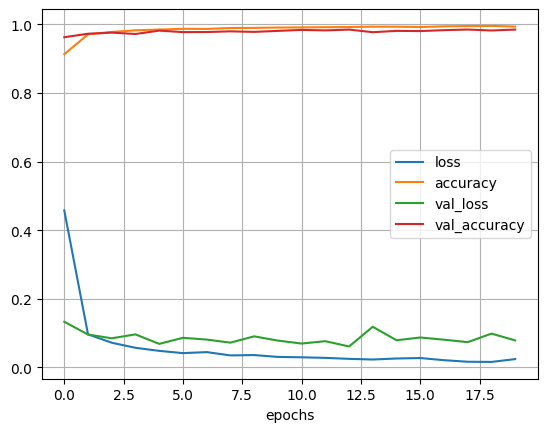

In [38]:
# Plot loss and accuracy curves
pd.DataFrame(data=history.history).plot()
plt.grid(True)
plt.xlabel('epochs')
